In [196]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [165]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [111]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (10, 8)})

In [219]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16718
Data columns (total 16 columns):
Name               16444 non-null object
Platform           16446 non-null object
Year_of_Release    16446 non-null float64
Genre              16444 non-null object
Publisher          16414 non-null object
NA_Sales           16446 non-null float64
EU_Sales           16446 non-null float64
JP_Sales           16446 non-null float64
Other_Sales        16446 non-null float64
Global_Sales       16446 non-null float64
Critic_Score       7983 non-null float64
Critic_Count       7983 non-null float64
User_Score         9839 non-null object
User_Count         7463 non-null float64
Developer          9906 non-null object
Rating             9768 non-null object
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


In [228]:
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')

In [229]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

User_Count         54.621184
User_Score         54.621184
Critic_Count       51.459321
Critic_Score       51.459321
Rating             40.605618
Developer          39.766509
Publisher           0.194576
Genre               0.012161
Name                0.012161
Global_Sales        0.000000
Other_Sales         0.000000
JP_Sales            0.000000
EU_Sales            0.000000
NA_Sales            0.000000
Year_of_Release     0.000000
Platform            0.000000
dtype: float64

About 6 columns are missing around 50% of their values. I think one of the reason is the prevalence of older consoles, that were around before the internet and reviews became common for games. It would be useful to split the data by the year the internet became mainstream in order to see how the missing values compare.

In [230]:
null_list = []
for year in range(1980,2017):
    null_list.append(df[df['Year_of_Release']==year].isnull().sum()['User_Count']/len(df[df['Year_of_Release']==year]))

In [231]:
null_by_year = pd.DataFrame(null_list, list(np.arange(1980,2017)))

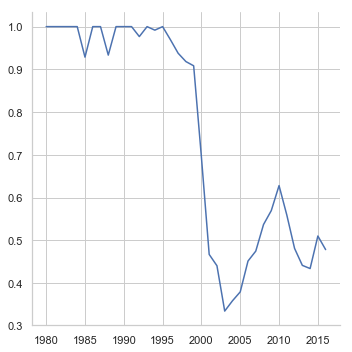

In [232]:
sns.relplot(data=null_by_year, kind='line', legend=False)

As I figured, there is a significant decline in missing review data of videogames starting in 1995. That makes sense, since that's when windows 95 came out and the internet started becoming mainstream, allowing for this industry to arise. However, there is an increase from about 2003-2010. My best guess is this is due to the gaming boom during the PS2 era, when so many games were coming out that it wasn't possible for reviewers to do every single one 

In [233]:
df = df[df['Year_of_Release'] < 2017]

In [234]:
temp1 = df.groupby(['Year_of_Release']).count()
temp1 = temp1.reset_index()

temp2 = df.groupby(['Year_of_Release']).sum()
temp2 = temp2.reset_index()

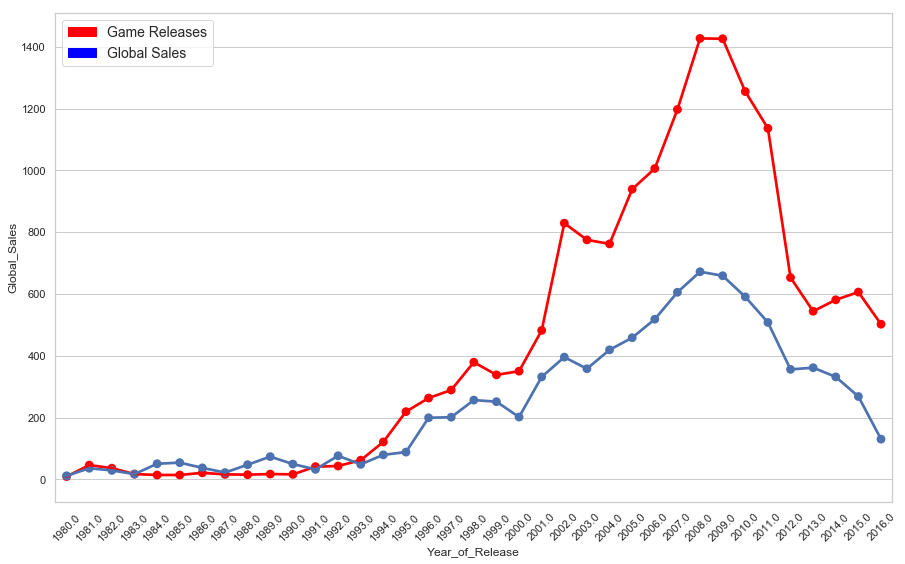

In [235]:
plt.figure(figsize=(15, 9))
plt.xticks(rotation=45)
sns.pointplot(data=temp1, x='Year_of_Release', y='Global_Sales', color='Red', legend=True)
sns.pointplot(data=temp2, x='Year_of_Release', y='Global_Sales')
blue_patch = mpatches.Patch(color='red', label='Game Releases')
red_patch = mpatches.Patch(color='blue', label='Global Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 14)

As expected, the graph shows a boom in game releases and sales during the PS2 era (best selling console of all time). The increase in missing game reviews makes sense because even though the internet was much more developed than in the 90s, such a large amount of releases makes it much harder for reviewers to keep up and inevitably leads to lower quality games being published.

In [236]:
clean_df = df.dropna()

In [237]:
clean_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [238]:
clean_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


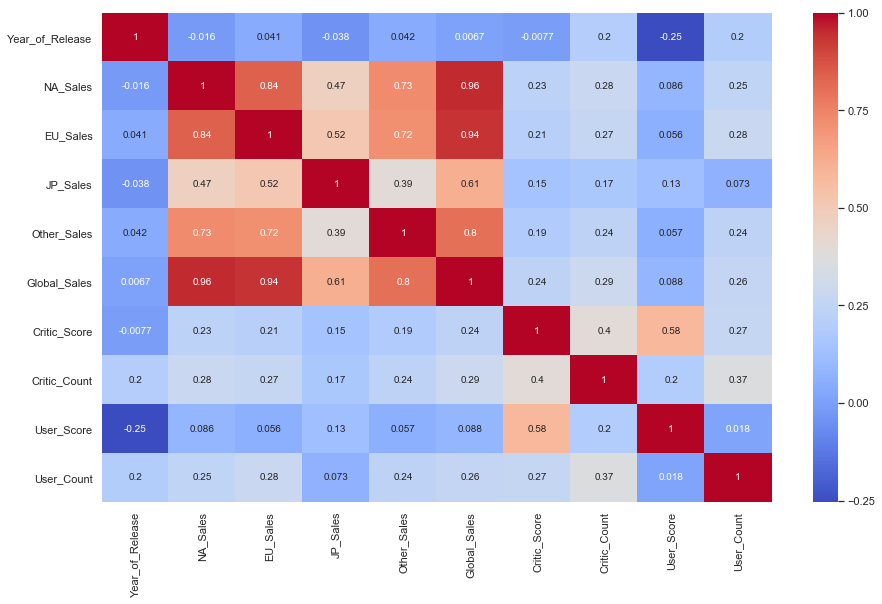

In [239]:
plt.figure(figsize=(15, 9))
sns.heatmap(clean_df.corr(), cmap='coolwarm', annot=True)

High correlation among sales except for the Japanese market, which makes sense since they have very different preferences. Global sales is highly correlated as well, since its just the aggregate of all sales. Lower correlations among the rest of the variables.

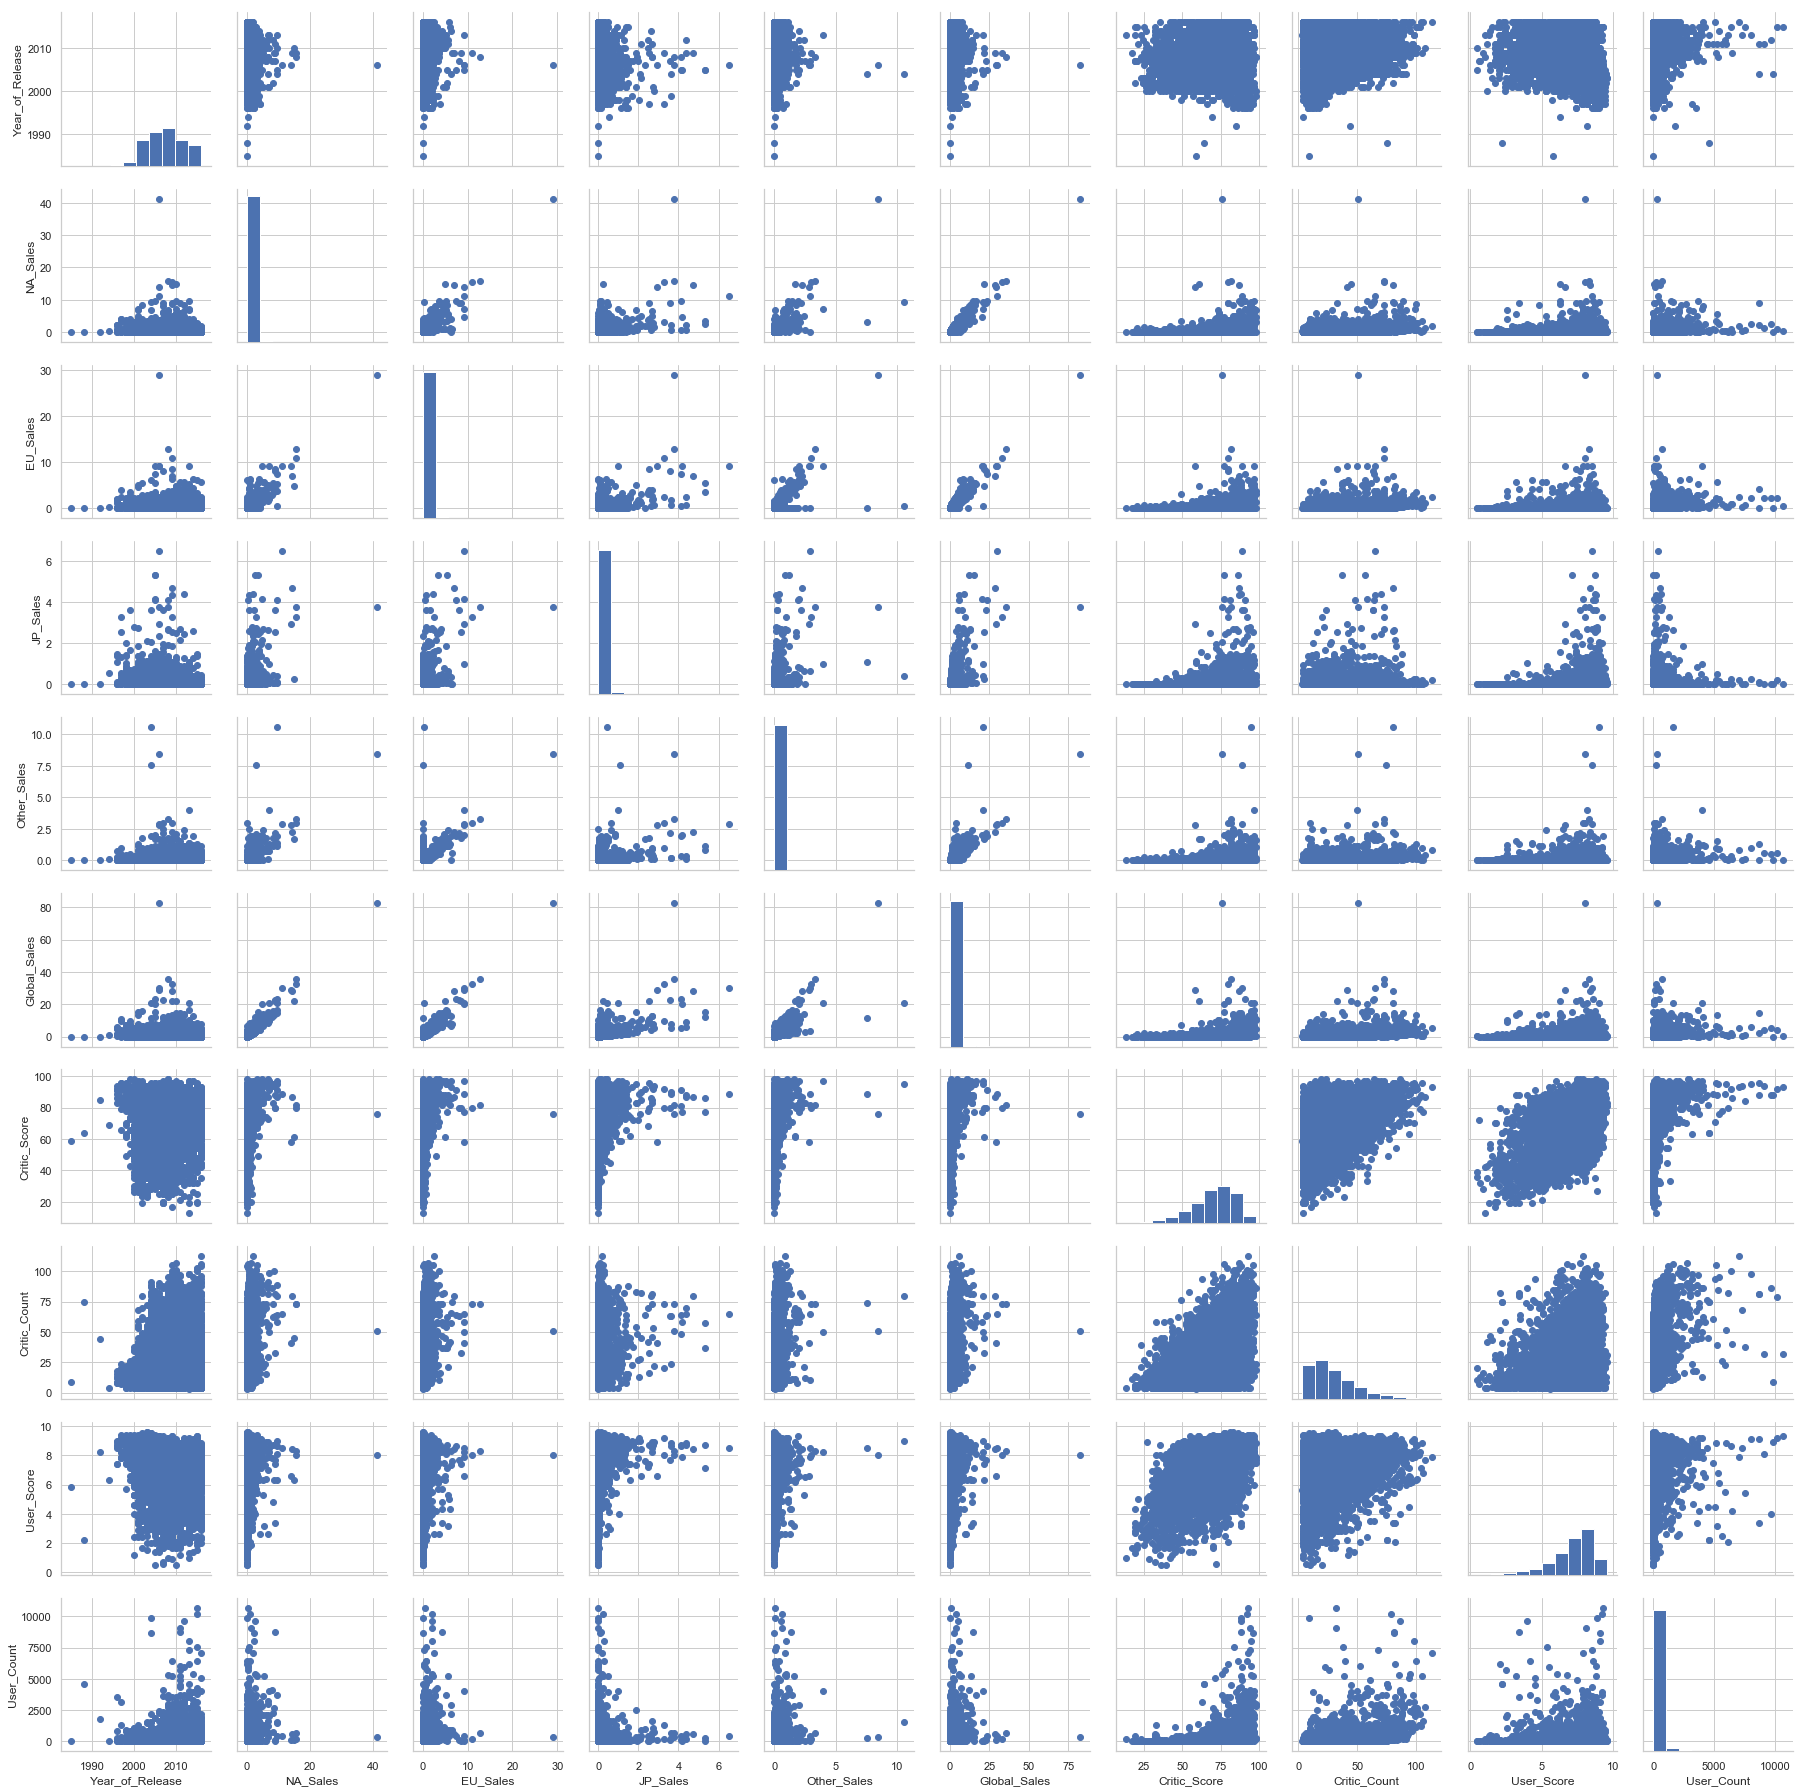

In [240]:
g = sns.PairGrid(clean_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

Distributions seem to be normal, but skewed to one side or another. As mentioned before, colinearity is low, except for sales variables

In [ ]:
sns.